### Part 3 데이터 살펴보기

In [1]:
import pandas as pd

#### 1. 데이터 프레임의 구조

##### 1-1. 데이터 내용 미리보기
- head() : 처음 n개 행 출력 , defalult = 5
- tail() : 마지막 n개 행 출력, defalult = 5

In [3]:
# 데이터 불러오기
df = pd.read_csv("./auto-mpg.csv", header = None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
             'acceleration', 'model_year','origin','name']
# 데이터 일부 확인
print(df.head())
print('\n')
print(df.tail())

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


      mpg  cylinders  displacement horsepower  weight  acceleration  \
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          1

##### 1-2. 데이터 요약 정보 확인하기
- df.shape : 데이터프레임의 크기(행,열)
- df.info() : 데이터프레임의 기본정보 출력 
    - (클래스 유형, 행 인덱스 구성, 열 이름 종류와 개수, 각 열의 자료형과 개수, 메모리 할당량 등 정보)
- df.describe() : 기술 통계 정보 요약
    - (평균, 표준편차, 최대값, 최소값, 중간값 등)

In [10]:
print(df.shape) # 398개의 행과 9개의 열로 이루어짐
print("\n")
print(df.info())
print("\n")
# 각 열의 자료형 확인
print(df.dtypes)
print("\n")
# 시리즈의 자료형 확인
print(df.mpg.dtypes)
print("\n")
# 기술통계정보 확인
print(df.describe())
print("\n")
print(df.describe(include = 'all')) # include = 'all' : 산술데이터가 아닌 열에 대한 정보 포함 

(398, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object


float64


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000

##### 1-3. 데이터 개수 확인
- count() : 각 열의 데이터 개수 시리즈 객체로 반환 / 유효한 값의 개수만 계산
- value_counts() : 시리즈 객체의 고유값 개수 세는데 사용
    - dropna = True 옵션 : NaN 제외 개수 계산 / default : False

In [12]:
print(df.count())
print(type(df.count()))
print("\n")

unique_values = df['origin'].value_counts() # 제조국가 데이터
print(unique_values)
print("\n")

print(type(unique_values_values))

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model_year      398
origin          398
name            398
dtype: int64
<class 'pandas.core.series.Series'>


1    249
3     79
2     70
Name: origin, dtype: int64


<class 'pandas.core.series.Series'>


#### 2. 통계 함수 적용

###### 2-1. 평균값
- mean() : 산술 데이터 갖는 모든 열의 평균값 각각 계산해 시리즈 객체로 반환

In [13]:
print(df.mean())
print("\n")
print(df['mpg'].mean())
print(df.mpg.mean())
print("\n")
print(df[['mpg','weight']].mean())

mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model_year        76.010050
origin             1.572864
dtype: float64


23.514572864321615
23.514572864321615


mpg         23.514573
weight    2970.424623
dtype: float64


##### 2-2. 중간값
- median() : 산술 데이터 갖는 모든 열의 중간값 계산해 시리즈로 반환

In [15]:
print(df.median())
print("\n")
print(df['mpg'].median())

mpg               23.0
cylinders          4.0
displacement     148.5
weight          2803.5
acceleration      15.5
model_year        76.0
origin             1.0
dtype: float64


23.0


##### 2-3. 최대값 
- max() : 데이터프레임의 각 열이 갖는 데이터 값 중 최대값 계산해 시리즈로 반환
    - 문자열의 경우 ASCII 숫자로 변환하여 크고 작음 비교

In [18]:
print(df.max())
print("\n")
print(df['mpg'].max())

mpg                         46.6
cylinders                      8
displacement                 455
horsepower                     ?
weight                      5140
acceleration                24.8
model_year                    82
origin                         3
name            vw rabbit custom
dtype: object


46.6


##### 2-4. 최소값
- min() : 각 열이 갖는 데이터 값 중 최소값 계산하여 시리즈로 반환
    - 문자열의 경우 ASCII 숫자로 변환하여 비교

In [19]:
print(df.min())
print("\n")
print(df['mpg'].min())

mpg                                   9
cylinders                             3
displacement                         68
horsepower                        100.0
weight                             1613
acceleration                          8
model_year                           70
origin                                1
name            amc ambassador brougham
dtype: object


9.0


##### 2-5. 표준편차
- std() : 산술 데이터 갖는 열의 표준편차 계산해 시리즈로 반환

In [21]:
print(df.std())
print("\n")
print(df['mpg'].std())

mpg               7.815984
cylinders         1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model_year        3.697627
origin            0.802055
dtype: float64


7.815984312565782


##### 2-6. 상관계수
- corr() : 두 열 간의 상관계수 계산
    - 산술 데이터 갖는 모든 열에 대해 2개씩 짝을 짓고, 각각의 경우의 상관계수 계산
    - 문자열 데이터는 계산 불가능

In [23]:
print(df.corr())
print("\n")
print(df[['mpg','weight']].corr())

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.775396     -0.804203 -0.831741      0.420289   
cylinders    -0.775396   1.000000      0.950721  0.896017     -0.505419   
displacement -0.804203   0.950721      1.000000  0.932824     -0.543684   
weight       -0.831741   0.896017      0.932824  1.000000     -0.417457   
acceleration  0.420289  -0.505419     -0.543684 -0.417457      1.000000   
model_year    0.579267  -0.348746     -0.370164 -0.306564      0.288137   
origin        0.563450  -0.562543     -0.609409 -0.581024      0.205873   

              model_year    origin  
mpg             0.579267  0.563450  
cylinders      -0.348746 -0.562543  
displacement   -0.370164 -0.609409  
weight         -0.306564 -0.581024  
acceleration    0.288137  0.205873  
model_year      1.000000  0.180662  
origin          0.180662  1.000000  


             mpg    weight
mpg     1.000000 -0.831741
weight -0.831741  1.000000


#### 3. 판다스 내장 그래프 도구 활용 
- 판다스 → Matplotlib 라이브러리 기능의 일부 내장 
- ∴ 따로 임포트 하지 않아도 그래프 그릴 수 있음 ! 
- plot() 메소드 사용
    - kind 옵션 : 그래프 종류 선택
    - line, bar, barh, his, box, kde, area, pie, scatter, hexbin

       1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  ...  2007  \
South  1186  1310  1444  1650  1847  2055  2244  2153  2393  2664  ...  4031   
North   263   247   221   231   230   213   193   170   186   194  ...   236   

       2008  2009  2010  2011  2012  2013  2014  2015  2016  
South  4224  4336  4747  4969  5096  5171  5220  5281  5404  
North   255   235   237   211   215   221   216   190   239  

[2 rows x 26 columns]




<AxesSubplot:>

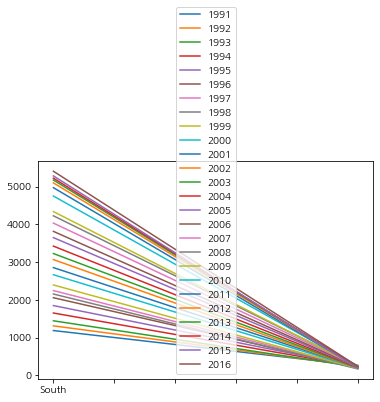

In [26]:
# 선 그래프
df = pd.read_excel("./남북한발전전력량.xlsx") # 데이터프레임 변환
df_ns = df.iloc[[0,5],3:] # 남북한 발전량 합계 데이터만 추출
df_ns.index = ['South','North']
df_ns.columns = df_ns.columns.map(int) # 열 이름의 자료형을 정수형으로 변경
print(df_ns.head())
print('\n')

df_ns.plot()

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230




<AxesSubplot:>

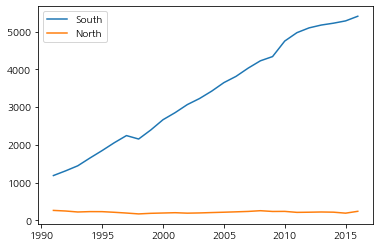

In [27]:
# 시간의 흐름에 따른 연도별 발전량 추이 확인
tdf_ns = df_ns.T # 연도를 x축으로 설정
print(tdf_ns.head())
print("\n")
tdf_ns.plot()
# 남한의 경우 지속적으로 증가햇지만, 북한은 지난 20년동안 발전량에 큰 변화가 없는 것을 확인할 수 있음.

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230




<AxesSubplot:>

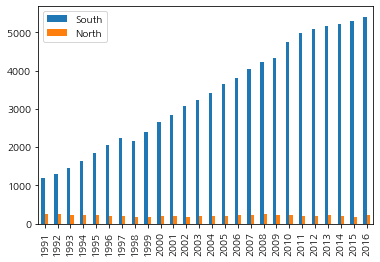

In [28]:
# 막대그래프
# 남북한의 발전량 규모와 변화 추이 파악
print(tdf_ns.head())
print("\n")
tdf_ns.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

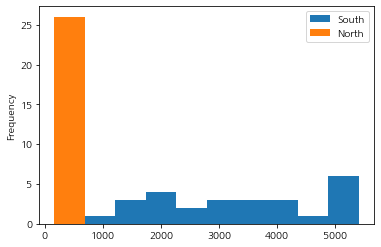

In [29]:
# 히스토그램
tdf_ns.plot(kind='hist')
# 북한은 지난 26년동안 줄곧 800 미만의 발전량을 기록한 것을 확인할 수 있음.

<AxesSubplot:xlabel='weight', ylabel='mpg'>

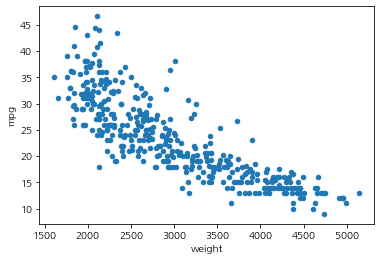

In [31]:
# 산점도
# UCI 자동차 연비 데이터셋
df = pd.read_csv("./auto-mpg.csv", header = None)
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
             'acceleration', 'model_year','origin','name']

df.plot(x = 'weight', y = 'mpg', kind = 'scatter')
# 자동차의 무게가 증가할 수록 연비는 전반적으로 낮아지는 경향을 보임.
# 자동차 무게와 연비는 역의 상관관계를 갖는다고 할 수 있음.

<AxesSubplot:>

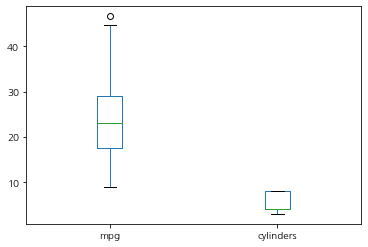

In [32]:
# boxplot : 각 변수들의 데이터가 퍼져있는 정도 확인할 때 사용 
df[['mpg','cylinders']].plot(kind='box')
# mpg 데이터는 10-45 범위에 넓게 분포되어 있으며, 이상값이 확인됨.
# cylinders 데이터는 10 미만의 범위에 몰려 있음.